# Airplane Crashes Analysis

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data, convert column 'Date' to type datetime, and create dataframe
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv', parse_dates=['Date'])
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:
# Verify column types
df.dtypes

Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                 float64
Summary                 object
dtype: object

In [4]:
# Display amount of missing values
df.isna().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [5]:
# Total airplane crashes
df.shape[0]

5268

In [6]:
# Total airplane crashes by year
crashes_by_year = df.groupby(df['Date'].dt.year)['Date'].count()
crashes_by_year

Date
1908     1
1912     1
1913     3
1915     2
1916     5
        ..
2005    51
2006    49
2007    54
2008    62
2009    24
Name: Date, Length: 98, dtype: int64

In [7]:
# Maximum airplane crashes in one year
crashes_by_year.max()

104

In [8]:
# Year with maximum airplane crashes
crashes_by_year.idxmax()

1972

In [9]:
# Moving average of airplane crashes by year, window size = 5 years
ma_crashes_by_year = crashes_by_year.rolling(window=5).mean()
# In moving average, there is a delay equal to window size - 1.
ma_crashes_by_year.fillna(0, inplace=True)
ma_crashes_by_year

Date
1908     0.0
1912     0.0
1913     0.0
1915     0.0
1916     2.4
        ... 
2005    63.6
2006    59.4
2007    55.2
2008    55.4
2009    48.0
Name: Date, Length: 98, dtype: float64

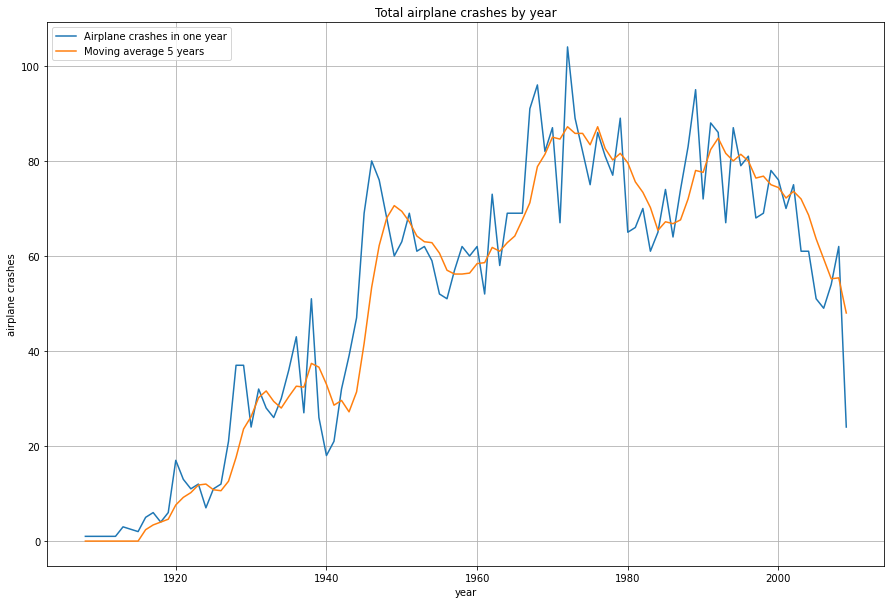

In [10]:
# Figure 1: Total airplane crashes by year
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(crashes_by_year, label='Airplane crashes in one year')
plt.plot(ma_crashes_by_year, label='Moving average 5 years')
plt.legend(loc=2)
plt.title('Total airplane crashes by year')
plt.xlabel('year')
plt.ylabel('airplane crashes');

### Analysis
The number of airplane crashes increased until the 70's, hitting its maximum at year 1972.

In [11]:
# Total fatalities
df['Fatalities'].sum()

105479.0

In [12]:
# Number of airplane crashes without fatalities
df.loc[df['Fatalities'] == 0, 'Fatalities'].count()

58

In [13]:
# Statistics of number of fatalities per airplane crash
df['Fatalities'].describe()

count    5256.000000
mean       20.068303
std        33.199952
min         0.000000
25%         3.000000
50%         9.000000
75%        23.000000
max       583.000000
Name: Fatalities, dtype: float64

In [14]:
# The deadliest airplane crash
df.iloc[df['Fatalities'].idxmax()]

Date                                          1977-03-27 00:00:00
Time                                                        17:07
Location                                 Tenerife, Canary Islands
Operator                         Pan American World Airways / KLM
Flight #                                                1736/4805
Route               Tenerife - Las Palmas / Tenerife - Las Palmas
Type                         Boeing B-747-121 / Boeing B-747-206B
Registration                                        N736PA/PH-BUF
cn/In                                        19643/11 / 20400/157
Aboard                                                      644.0
Fatalities                                                  583.0
Ground                                                        0.0
Summary         Both aircraft were diverted to Tenerife becaus...
Name: 2963, dtype: object

In [15]:
# Summary of deadliest airplane crash
df.loc[df['Fatalities'].idxmax(), 'Summary']

'Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The Pan Am aircraft was named Clipper Victor. The KLM aircraft was named Rhine River.'

### Analysis
From 1908 to 2009, there were 5268 airplane crashes in which 105479 people died. There were 58 airplane crashes without fatalities. Nearly 20 people died in average in each crash, however, in 50% of crashes there were less than 10 fatalities. The maximum number of fatalities in one airplane crash is 583 and took place in Tenerife, Canary Islands.

In [16]:
# Get the last part of location (US state, country, region)
df['Location2'] = df['Location'].str.split(',').str[-1].str.strip()
df['Location2']

0                    Virginia
1                  New Jersey
2                      Canada
3          Over the North Sea
4                     Germany
                ...          
5263                Indonesia
5264    DemocratiRepubliCongo
5265                   Brazil
5266                   Canada
5267                    India
Name: Location2, Length: 5268, dtype: object

In [17]:
# Group by 'Location2'
crashes_by_location = df.groupby('Location2')['Location2'].count()
crashes_by_location

Location2
110 miles West of Ireland               1
325 miles east of Wake Island           1
AK                                      2
Afghanistan                            32
Afghanstan                              2
                                       ..
Zimbabwe                                2
off Angola                              1
off Australia                           1
off Bermuda                             1
off the Philippine island of Elalat     1
Name: Location2, Length: 496, dtype: int64

In [18]:
# Maximun number of crashes in one location
crashes_by_location.max()

189

In [19]:
# Location2, where happened the maximum number of crashes
crashes_by_location.idxmax()

'Brazil'

In [20]:
# Crashes in Brazil
df.loc[df['Location2'] == 'Brazil']

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Location2
138,1928-03-03,NaN,"Rio de Janeiro, Brazil",NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,0.0,NaN,Brazil
163,1928-12-03,08:00,Brazil,Syndicato Condor,NaN,NaN,Dornier Wal,P-BACA,063,14.0,14.0,0.0,The seaplane took off form the bay and narrowl...,Brazil
164,1928-12-04,NaN,"Rio de Janeiro, Brazil",NaN,NaN,NaN,Junkers G24,NaN,NaN,6.0,6.0,0.0,The aircraft's wingtip struck the water and cr...,Brazil
227,1930-11-07,NaN,"Off of Santos, Brazil",Syndicato Condor,NaN,NaN,Junkers G-24,P-BAHA,921,9.0,1.0,0.0,Crashed into the sea.,Brazil
252,1931-10-14,NaN,Brazil,Syndicato Condor,NaN,NaN,Dornier Wal,P-BALSA,107,3.0,3.0,0.0,NaN,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2007-08-22,00:36,"Near Curitiba, Brazil",Two Taxi Aero,NaN,Curitiba - Jundiai,Embraer EMB-110P1 Bandeirant,PT-SDB,110323,2.0,2.0,0.0,Crashed shortly after taking off from Curitiba,Brazil
5177,2007-11-04,14:10,"Sao Paulo, Brazil",Reali Taxi Aereo,NaN,Sao Paulo - Rio de Janeiro,Learjet 35A,PT-OVC,35A-339,2.0,2.0,6.0,"The executive jet took off, banked to the righ...",Brazil
5191,2008-02-26,16:16,"Off Macae , Rio de Janeiro , Brazil",BHS - Brazilian Helicopter Service Air Taxi,NaN,Oil Rig P18 - Macae,Eurocopter AS332L2 Super Puma,PP-MUM,2570,20.0,5.0,0.0,Less than half minute after the taking-off fro...,Brazil
5246,2009-02-07,14:00,"Manacapuru, Brazil",Aerotaxi Manaus,NaN,Coari - Manus,Bandeirante EMB-110P1,PT-SEA,110352,28.0,24.0,0.0,The plane was being used as an air taxi to fer...,Brazil


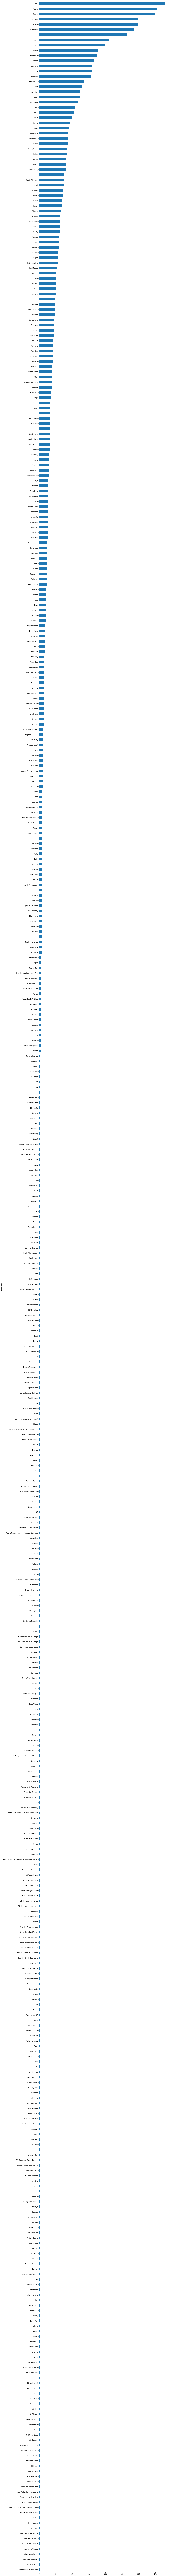

In [21]:
# Horizontal bar chart of airplane crashes by location
plt.figure(figsize=[15,300])
plt.grid(True)
crashes_by_location.sort_values(ascending=True).plot.barh();

### Analysis
Brazil leads in the number or airplane crashes, however, the states of the USA summed up would make the USA the leader of airplane crashes.